In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras

In [112]:
# Load the CSV file
csv_file_path = "processed_data.csv"
df = pd.read_csv(csv_file_path, sep=';', header=0)


In [113]:
df.head(3)

,label,features
0,0,"116.19,116.19,116.19,5780.0,381.32,-102.55,114..."
1,0,"165.59,165.59,165.59,-3380.0,93.41,-117.02,117..."
2,0,"163.16,163.16,163.16,1780.0,-308.79,-17.45,119..."


In [114]:
# Split the data into features and labels
X = df['features'].str.split(',', expand=True).astype(float)
y = df['label']

In [115]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(np.unique(y)), activation='softmax')  # Number of unique classes in y
])


In [147]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [148]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               467072    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 3)                 195       
                                                                 
Total params: 475523 (1.81 MB)
Trainable params: 475523 (1.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
10/10 [==============================] - 1s 28ms/step - loss: 0.8837 - accuracy: 0.6600 - val_loss: 0.4864 - val_accuracy: 0.8400
Epoch 2/8
10/10 [==============================] - 0s 11ms/step - loss: 0.2459 - accuracy: 0.9267 - val_loss: 1.1071 - val_accuracy: 0.7733
Epoch 3/8
10/10 [==============================] - 0s 11ms/step - loss: 0.0723 - accuracy: 0.9733 - val_loss: 0.5163 - val_accuracy: 0.8800
Epoch 4/8
10/10 [==============================] - 0s 11ms/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.5593 - val_accuracy: 0.8667
Epoch 5/8
10/10 [==============================] - 0s 12ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.5450 - val_accuracy: 0.8667
Epoch 6/8
10/10 [==============================] - 0s 12ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.5584 - val_accuracy: 0.8667
Epoch 7/8
10/10 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5663 - val_accuracy: 0.8667
Epoch 8/8
10/10 [===

In [150]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

3/3 [==============================] - 0s 6ms/step - loss: 0.5726 - accuracy: 0.8667
Test accuracy: 0.8666666746139526


In [122]:
from matplotlib import pyplot as plt

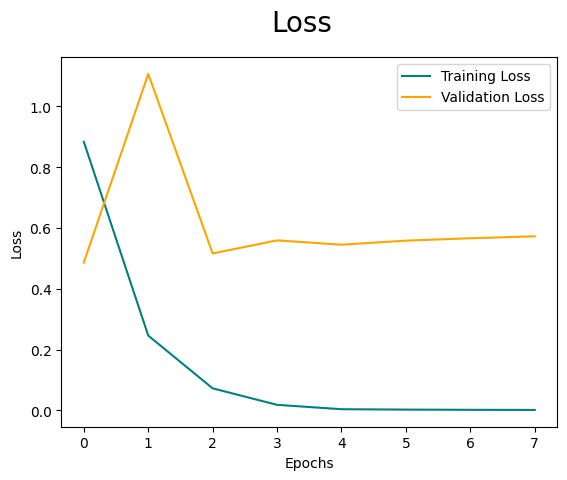

In [151]:
# Assuming you have already trained the model and stored the history in the 'history' variable

# Extract accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
fig = plt.figure()
plt.plot(loss, color='teal', label='Training Loss')
plt.plot(val_loss, color='orange', label='Validation Loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()



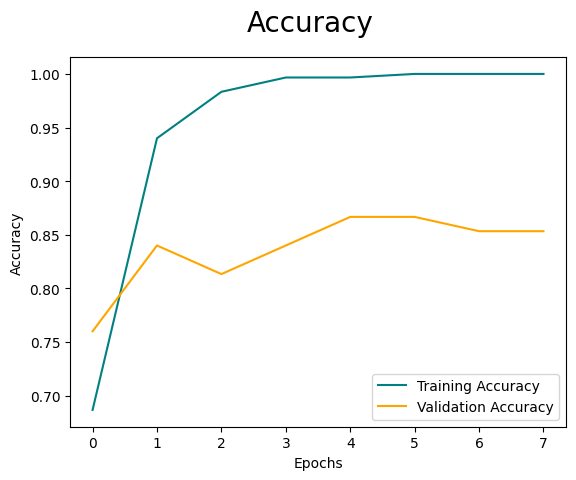

In [144]:
# Plot the accuracy
fig = plt.figure()
plt.plot(acc, color='teal', label='Training Accuracy')
plt.plot(val_acc, color='orange', label='Validation Accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [152]:
# Save the model
model.save("classification_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [156]:
loaded_model = keras.models.load_model("classification_model.h5")

In [157]:
csv_file_path = "raw.csv"
df = pd.read_csv(csv_file_path, sep=';', header=0)
new_data = df['features'].str.split(',', expand=True).astype(float)
new_data = scaler.transform(new_data)
predictions = loaded_model.predict(new_data)
print(predictions)

1/1 [==============================] - 0s 239ms/step
[[9.9892348e-01 1.0764282e-03 1.5949549e-07]]


In [158]:
predicted_class = np.argmax(predictions)

if predicted_class == 0:
    print("Fruit belongs to raw class")
elif predicted_class == 1:
    print("Fruit belongs to intermediate class")
else:
    print("Fruit belongs to ripe class")

print("Predicted Class:", predicted_class)



Fruit belongs to raw class
Predicted Class: 0


In [159]:
csv_file_path = "ripe.csv"
df = pd.read_csv(csv_file_path, sep=';', header=0)
new_data = df['features'].str.split(',', expand=True).astype(float)
new_data = scaler.transform(new_data)
predictions = loaded_model.predict(new_data)

1/1 [==============================] - 0s 115ms/step


In [160]:
predicted_class = np.argmax(predictions)

if predicted_class == 0:
    print("Fruit belongs to raw class")
elif predicted_class == 1:
    print("Fruit belongs to intermediate class")
else:
    print("Fruit belongs to ripe class")

print("Predicted Class:", predicted_class)


Fruit belongs to ripe class
Predicted Class: 2


1/1 [==============================] - 0s 34ms/step


In [135]:
print(predictions)

[[2.0645602e-06 1.7035418e-03 9.9829441e-01]]


Fruit belongs to ripe class
Predicted Class: 2


In [142]:

csv_file_path = "intermediate.csv"
df = pd.read_csv(csv_file_path, sep=';', header=0)
new_data = df['features'].str.split(',', expand=True).astype(float)
new_data = scaler.transform(new_data)
predictions = loaded_model.predict(new_data)
print(predictions)

1/1 [==============================] - 0s 20ms/step
[[4.3213182e-05 9.9872583e-01 1.2308899e-03]]


In [143]:
predicted_class = np.argmax(predictions)

if predicted_class == 0:
    print("Fruit belongs to raw class")
elif predicted_class == 1:
    print("Fruit belongs to intermediate class")
else:
    print("Fruit belongs to ripe class")

print("Predicted Class:", predicted_class)


Fruit belongs to intermediate class
Predicted Class: 1
